<a href="https://colab.research.google.com/github/hope04302/freeSearch/blob/main/commonAI/nsmcTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실험 1 (5.24.)

- 본격적인 실험에 앞서, 데이터셋 분석

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random as rd

In [ ]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

train_text_x = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in train_text.split('\n')[1:] if row.count('\t') > 0])

test_text_x = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

for i in range(10):
    print(train_text_x[i], train_y[i])

4893335/4893335 [==============================] - 0s 0us/step
아 더빙.. 진짜 짜증나네요 목소리 [1 0]
흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 [0 1]
너무재밓었다그래서보는것을추천한다 [1 0]
교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 [1 0]
사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 [0 1]
막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움. [1 0]
원작의 긴장감을 제대로 살려내지못했다. [1 0]
별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네 [1 0]
액션이 없는데도 재미 있는 몇안되는 영화 [0 1]
왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나? [0 1]


악플, 선플 수 비교

In [ ]:
print(np.sum(train_y, axis=0), np.sum(test_y, axis=0))

[75173 74827] [24827 25173]


쓰여있는 단어 분석

In [ ]:
words = set()
for i in train_text_x:
    words |= set(i)
print(len(words))
print(words)

3004
{'캘', '급', '곁', '쟎', '샘', '억', 'ㅢ', '길', '뚝', '車', '랬', '견', '봣', '왜', '맨', '끼', '텔', '쌈', '첸', '떡', '크', '릐', '꺜', '즛', '담', '귓', '욥', '꽤', '또', '펌', '⑦', '쥐', '별', '듬', '難', '렬', '끾', '一', '律', '횡', '깡', '햤', '옯', '驛', '삿', '츼', '峽', '外', '벙', '잤', '뽜', '그', '밎', '초', '툼', '촛', '뿍', '윘', '스', '낍', '꺅', '됨', '냇', '젔', '략', '뉴', 'ㅖ', '뢰', '묘', '걈', '풕', '찟', '짇', '슈', '챙', 'ッ', '껄', 'ㅎ', 'g', '넜', '쭈', '흑', '룻', '꼿', '꼮', '냄', '紅', '퐝', '귤', '빛', '늑', '쉘', '깈', '횬', '♥', '꼬', '뿐', '엊', '뱉', '댘', '칠', '빈', '잘', '旋', '멓', '봊', '노', '땓', '팠', '균', '똴', '더', '댜', '겪', '탐', '씸', '핶', '롹', '흙', '넹', '떈', '쓉', '샬', '뻗', '휩', '싫', '쿤', '욷', '手', '뭡', '세', '햫', '룰', '넼', '《', '간', '앱', '죽', '흔', '왘', '◑', 'ㅌ', '힌', '셈', '싯', '쁘', '겼', '빳', '법', 'W', 'v', '칵', '슛', '戰', '반', '틋', '웄', '괘', 'ㅊ', '밭', '닌', '흥', 'ピ', '」', '덷', '넫', '돌', '꽈', 'R', '헬', '렉', '部', '콮', '英', '셸', '밟', '온', '두', '쫏', '듯', '죳', '핳', '씌', '큰', '씹', '맺', '효', '밑', '좐', '발', '쟉', '냅', '캢', '也', '찹', '랩', '굽', '챕', '킁',

## 실험 2 (5.26.)

5월 24일
- 처음: kss 사용
- 문제: 처음에는 kss를 쓸려고 했는데 너무 느려서 kiwi로 바꿈
- 재시행
- 문제: loss, accuracy가 훈련 데이터에서 안 변함.
140자는 제대로 학습 X (50% accuracy, 0.6 loss 에서 변경 무)
- padding 기준 160자로 변경

5월 25일
- 160자로 해도 안됨(다른 게 문제인듯)
- 토큰화 변경: 문장부호 제거
- 그래도 안됨
- 또 변경: embedding: 3000 -> 2500

5월 26일
- 140자로 변경
- 그러니깐 됨!!
- 결론: 160자로 하면 안됨. 140자로
- 실험: 음절 단위, lower()만 하고 다른 건 제거 하나도 안하기, 띄어쓰기 제거

---

- 음절 단위로 토큰화, 2500 이내 글자 제외하고는 `<unk>`로 처리.
- 시작부분이 `<st>`, 문장 끝마다 `<ed>` 추가, 띄어쓰기 무시
- 140자를 기준으로 뒤에 패딩(왜냐하면, 최대 길이가 140자 이내)
- 모델은 아래와 같음

```
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2500, 300, input_length=140),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=100, batch_size=64, validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

```

> 결과:
>
> 90% 못 넘김

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random as rd

In [ ]:
%%bash
pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

train_text_x = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in train_text.split('\n')[1:] if row.count('\t') > 0])

test_text_x = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(len(train_y), len(test_y))

150000 50000


In [ ]:
import re
from kiwipiepy import Kiwi

kiwi = Kiwi()

def edit_str_21(text):

    def edit(string):
        res = ['<st>']
        sents = kiwi.split_into_sents(string)
        for i in sents:
            i = i.text
            i = re.sub(r"""[ ]""", "", i).lower()
            res.extend(i)
            res.append('<ed>')
        return res
    
    return [edit(string) for string in text]

train_sentences = edit_str_21(train_text_x)
test_sentences = edit_str_21(test_text_x)
for i in train_sentences[:10]:
    print(i)

['<st>', '아', '더', '빙', '.', '.', '<ed>', '진', '짜', '짜', '증', '나', '네', '요', '<ed>', '목', '소', '리', '<ed>']
['<st>', '흠', '.', '.', '.', '<ed>', '포', '스', '터', '보', '고', '초', '딩', '영', '화', '줄', '.', '.', '.', '.', '<ed>', '오', '버', '연', '기', '조', '차', '가', '볍', '지', '않', '구', '나', '<ed>']
['<st>', '너', '무', '재', '밓', '었', '다', '<ed>', '그', '래', '서', '보', '는', '것', '을', '추', '천', '한', '다', '<ed>']
['<st>', '교', '도', '소', '이', '야', '기', '구', '먼', '.', '.', '<ed>', '솔', '직', '히', '재', '미', '는', '없', '다', '.', '.', '<ed>', '평', '점', '조', '정', '<ed>']
['<st>', '사', '이', '몬', '페', '그', '의', '익', '살', '스', '런', '연', '기', '가', '돋', '보', '였', '던', '영', '화', '!', '<ed>', '스', '파', '이', '더', '맨', '에', '서', '늙', '어', '보', '이', '기', '만', '했', '던', '커', '스', '틴', '던', '스', '트', '가', '너', '무', '나', '도', '이', '뻐', '보', '였', '다', '<ed>']
['<st>', '막', '걸', '음', '마', '뗀', '3', '세', '부', '터', '초', '등', '학', '교', '1', '학', '년', '생', '인', '8', '살', '용', '영', '화', '.', 'ㅋ', 'ㅋ', 'ㅋ', '<ed>', '.', '.', '.',

최대 길이 확인

In [ ]:
maximum = 0
for i in train_sentences:
    maximum = max(len(i), maximum)
print(maximum)

149


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=2500)
tokenizer.fit_on_texts(train_sentences)

train_x = tokenizer.texts_to_sequences(train_sentences)
train_x = pad_sequences(train_x, padding='post', maxlen=140)  # padding='pre': 앞에 패딩 추가
test_x = tokenizer.texts_to_sequences(test_sentences)
test_x = pad_sequences(test_x, padding='post', maxlen=140)  # padding='pre': 앞에 패딩 추가

print(train_x[:5])
print(train_y[:5])

[[   3   14   95  535    2    2    1   55   85   85  322   16   53   32
     1  330  105   25    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3  708    2    2    2    1  205   39  147   19    7  276  388   10
     9  222    2    2    2    2    1   76  190   62   17  157  251   11
   798    8  119  100   16    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0  

In [ ]:
def f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2 * (precision*recall)/(precision+recall + tf.keras.backend.epsilon())
    return f1_val

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2500, 300, input_length=140),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

history = model.fit(train_x, train_y, epochs=100, batch_size=64, validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100
1875/1875 [==============================] - 53s 26ms/step - loss: 0.6934 - accuracy: 0.5019 - f1_score: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5027 - val_f1_score: 0.5027
Epoch 2/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6933 - accuracy: 0.4972 - f1_score: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4976 - val_f1_score: 0.4976
Epoch 3/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6935 - accuracy: 0.4996 - f1_score: 0.4996 - val_loss: 0.6933 - val_accuracy: 0.4978 - val_f1_score: 0.4978
Epoch 4/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6835 - accuracy: 0.5208 - f1_score: 0.5208 - val_loss: 0.5766 - val_accuracy: 0.7200 - val_f1_score: 0.7201
Epoch 5/100
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4484 - accuracy: 0.7925 - f1_score: 0.7925 - val_loss: 0.4100 - val_accuracy: 0.8159 - val_f1_score: 0.8159
Epoch 6/100
1875/1875 [==============================] 

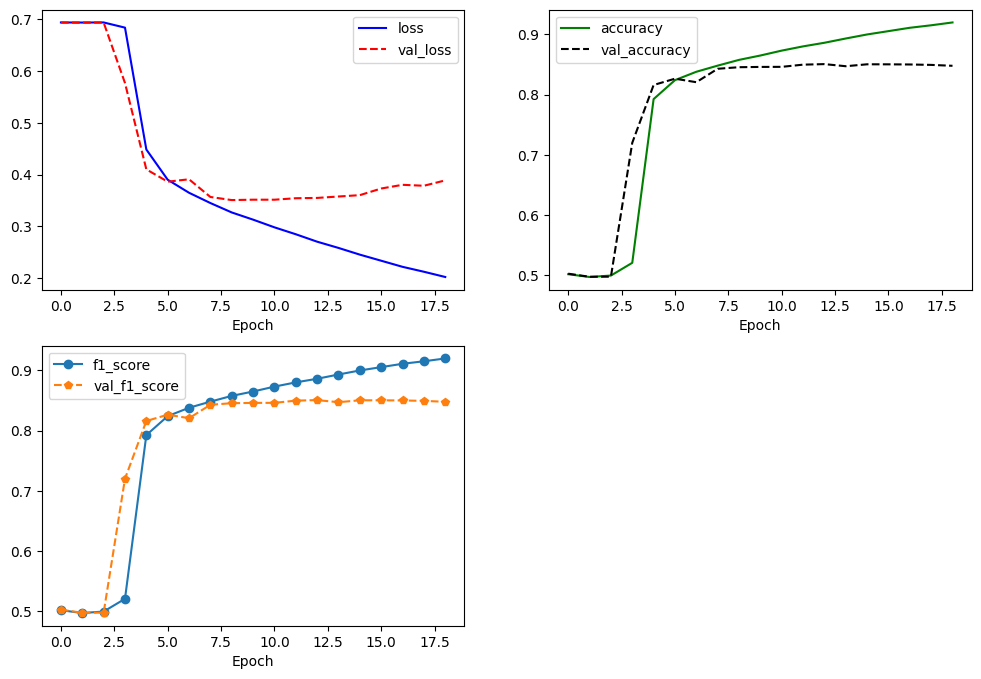

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history.history['f1_score'], 'o-', label='f1_score')
plt.plot(history.history['val_f1_score'], 'p--', label='val_f1_score')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_x, test_y, verbose=0)

[0.3596566915512085, 0.8389800190925598, 0.8389914631843567]

In [ ]:
for i in range(20):
    print(test_text_x[i], test_y[i])
    print(model.predict(test_x[i:i + 1], verbose=0)[0])

굳 ㅋ [0 1]
[0.07003415 0.92996585]
GDNTOPCLASSINTHECLUB [1 0]
[0.18647127 0.8135287 ]
뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아 [1 0]
[0.87493163 0.12506834]
지루하지는 않은데 완전 막장임... 돈주고 보기에는.... [1 0]
[0.9974023  0.00259778]
3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠?? [1 0]
[0.9981592  0.00184074]
음악이 주가 된, 최고의 음악영화 [0 1]
[0.02513976 0.97486025]
진정한 쓰레기 [1 0]
[0.9971342  0.00286573]
마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다 [1 0]
[0.99881977 0.0011802 ]
갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다 [1 0]
[9.998578e-01 1.421499e-04]
이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네.. [0 1]
[0.8938152  0.10618474]
괜찮네요오랜만포켓몬스터잼밌어요 [0 1]
[8.863539e-05 9.999113e-01]
한국독립영화의 한계 그렇게 아버지가 된다와 비교됨 [1 0]
[0.66993576 0.33006427]
청춘은 아름답다 그 아름다움은 이성을 흔들어 놓는다. 찰나의 아름다움을 잘 포착한 섬세하고 아름다운 수채화같은 퀴어영화이다. [0 1]
[3.6220087e-04 9.9963784e-01]
눈에 보이는 반전이었지만 영화의 흡인력은 사라지지 않았다. [0 1]
[0.5700113  0.42998868]
"""스토리, 연출, 연기, 비주얼 등 영화의 기본 조차 안된 영화에 무슨 평을 해. 이런 영화 찍고도 김문옥 감독은 """"내가 영화 경력

테스트

In [ ]:
SENT = '''너무 예뻐요'''

# 가공
lst_one = edit_str_21([SENT])[0]
lst = [lst_one[:i + 1] for i in range(len(lst_one))]
lst = tokenizer.texts_to_sequences(lst)
lst = pad_sequences(lst, padding='post', maxlen=140)  # padding='pre': 앞에 패딩 추가

for i, j in zip(lst, lst_one):
    print(j, model.predict(np.array([i]), verbose=0)[0][1])

<st> 0.3593542
너 0.11886697
무 0.016810061
예 0.016744822
뻐 0.5529826
요 0.65818244
<ed> 0.96742356


# 본격적인 실험
- 140자 기준(음절 실험에서는 이건 최대한 고정하도록)
- 데이터 전처리
    1. 음절 / 음소 / 단어(okt, kkma)
        - 음절, 음소 기준일 땐, 띄어쓰기는 없애기
    2. 문장부호 제거 여부
        - . , " ' ? ! 등
    3. 중국어, 일본어, 영어 처리 방법
        - 한글 이외 단어의 비중이 절반을 넘길 때, 이는 테스트 데이터에서 배제하는 방법
    4. vector 크기
        - 2500자? 3000자? 1500자?
        - 음절, 음소 등 기준에 따라 다름
    6. 다양한 데이터 반영을 위해 다른 데이터셋을 추가?
- layer 관련
    5. embedding layer 크기
    1. 중간 레이어 관련
        - biLSTM
        - CNN(클린봇 자료 참고)
- 기타
    1. padding 크기 조절?


In [ ]:
화장실